In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Hacemos Web Scrapping y obtenemos el html
direccion="https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico"
pagina=requests.get(direccion)
sopa=BeautifulSoup(pagina.content,"html.parser")
#print(sopa.prettify())

In [3]:
datos=sopa.find_all('p',class_="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base")
#print(datos)

In [4]:
#Guardamos los precios en una lista
precios=list()
for x in datos:
    #text nos devuleve el texto, split nos devuelve una lista con las palabras separadas y seleccionamos los precios que se encurentran en la cailla 2
    precios.append(x.text.split('$')[1])
precios

['10,000,000',
 '1,850,000',
 '4,900,000',
 '3,800,000',
 '3,895,000',
 '2,395,000',
 '3,240,000',
 '1,000,000',
 '1,600,000',
 '3,600,000',
 '10,500,000',
 '5,400,000',
 '2,350,000',
 '7,595,000',
 '1,000,000',
 '3,907,209',
 '2,280,000',
 '4,195,000',
 '5,295,000',
 '3,545,000']

In [5]:
#Convertimos de string a int los precios
for x in range(len(precios)):
  precios[x]= precios[x].replace(',', '')
  precios[x] = int(precios[x])
precios

[10000000,
 1850000,
 4900000,
 3800000,
 3895000,
 2395000,
 3240000,
 1000000,
 1600000,
 3600000,
 10500000,
 5400000,
 2350000,
 7595000,
 1000000,
 3907209,
 2280000,
 4195000,
 5295000,
 3545000]

In [6]:
#Obtenemos el html de los tamaños y otras características
datos=sopa.find_all ('span', class_="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black")
for d in datos:
  pass
  #print(d)

In [7]:
#creamos un ciclo para guardar los datos
tamaños, recamaras, baños, garage = [], [], [], []
i=-1
for d in datos:
  i+=1
  if(i==0):
    tamaños.append(int(d.text.split()[0]))
  elif(i==1):
    recamaras.append(int(d.text))
  elif(i==2):
    baños.append(int(d.text))
  elif(i==3):
    garage.append(int(d.text))
  else:
    i=-1

In [8]:
print('tamaños ---> ', tamaños)
print('recamaras ---> ', recamaras)
print('baños ---> ', baños)
print('garage ---> ', garage)

tamaños --->  [655, 96, 335, 220, 82, 69, 127, 44, 59, 83, 660, 243, 82, 280, 49, 114, 80, 119, 129, 82]
recamaras --->  [3, 2, 2, 3, 2, 1, 3, 2, 2, 3, 3, 2, 2, 4, 1, 1, 3, 3, 3, 2]
baños --->  [4, 1, 3, 3, 2, 1, 3, 1, 2, 2, 2, 3, 2, 4, 1, 1, 1, 2, 2, 2]
garage --->  [2, 1, 5, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2]


In [9]:
#comprobamos que no falte o sobre ningun dato
print(len(precios))
print(len(tamaños))
print(len(baños))
print(len(recamaras))
print(len(garage))

20
20
20
20
20


In [10]:
#Sacamos correlación entre baños, tamaño, recamaras, garage y precio
ByP=np.corrcoef(baños, precios)
TyP=np.corrcoef(tamaños, precios)
RyP=np.corrcoef(recamaras, precios)
GyP=np.corrcoef(garage, precios)
print(ByP)
print(TyP)
print(RyP)
print(GyP)

[[1.         0.65479785]
 [0.65479785 1.        ]]
[[1.         0.91913373]
 [0.91913373 1.        ]]
[[1.         0.53785066]
 [0.53785066 1.        ]]
[[1.         0.41167362]
 [0.41167362 1.        ]]


In [11]:
#Vemos que la correlacion entre tamaño y precio es mayor, así que sacamos la correlación lineal

sx=0
sy=0
sx2=0
sxy=0
n=len(precios)

for i in range(n):
  sx+=tamaños[i]
  sy+=precios[i]
  sx2+=tamaños[i]**2
  sxy+=tamaños[i]*precios[i]

m=(sxy - ((sx*sy)/n)) / (sx2 - ((sx**2)/n))
a=((n*sxy)-(sx*sy)) / ((n*sx2) - (sx**2))
print(m, a)

bclase=precios[15]-(m*tamaños[15])
bgoogle=(sy-(a*sx))/n
print(bclase, bgoogle)

13388.000618820959 13388.00061882096
2380976.9294544104 1702165.1383646987


In [12]:
#Creamos la regresión lineal
yclase=[]
ygoogle=[]
for i in range(n):
  yclase.append(m*tamaños[i]+bclase)
  ygoogle.append(a*tamaños[i]+bgoogle)

print(yclase)
print(ygoogle)

[11150117.334782138, 3666224.9888612228, 6865957.136759432, 5326337.0655950215, 3478792.980197729, 3304748.9721530564, 4081253.008044672, 2970048.9566825326, 3170868.9659648472, 3492180.98081655, 11217057.337876244, 5634261.079827903, 3478792.980197729, 6129617.102724278, 3036988.9597766376, 3907209.0, 3452016.978960087, 3974149.0030941046, 4108029.009282314, 3478792.980197729]
[10471305.543692429, 2987413.197771511, 6187145.34566972, 4647525.27450531, 2799981.189108018, 2625937.181063345, 3402441.2169549605, 2291237.165592821, 2492057.1748751355, 2813369.1897268384, 10538245.546786534, 4955449.288738192, 2799981.189108018, 5450805.311634568, 2358177.168686926, 3228397.2089102883, 2773205.187870376, 3295337.2120043933, 3429217.2181926025, 2799981.189108018]


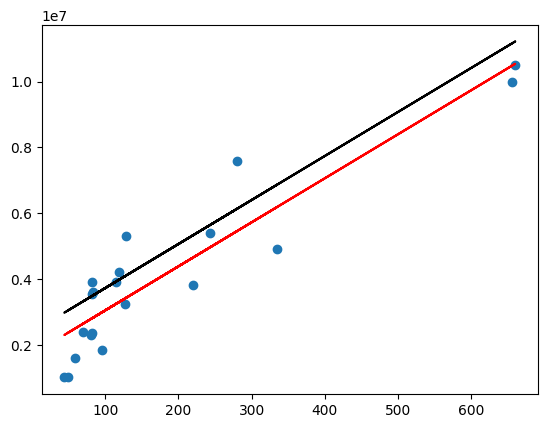

In [14]:
#graficamos 
plt.scatter(tamaños, precios)
plt.plot(tamaños, yclase, color='black')
plt.plot(tamaños, ygoogle, color='red')